# STEP 1: Title, Name and References

### Title: Predict the car price auction by using linear regression models. 
### Name: Taweepong Hieikul
### References: 
- https://scikit-learn.org/
- https://stackoverflow.com/
- https://machinelearningmastery.com
- https://towardsdatascience.com
- https://www.askpython.com
- https://data36.com

# STEP 2: Library import and data loading

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
#load dataset
df_ori = pd.read_csv("dataset/Lab02_prepared.csv")
df_ori.head()

,year,condition,odometer,mmr,price,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,2.2,36941.0,15000.0,12800.0,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2013,3.7,27601.0,13100.0,14800.0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,3.5,14184.0,17700.0,16500.0,4,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2005,3.8,104969.0,2500.0,2900.0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2010,5.0,64812.0,19650.0,21700.0,5,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
#check data type
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91768 entries, 0 to 91767
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                91768 non-null  int64  
 1   condition           91768 non-null  float64
 2   odometer            91768 non-null  float64
 3   mmr                 91768 non-null  float64
 4   price               91768 non-null  float64
 5   condition_round     91768 non-null  int64  
 6   body_Minivan        91768 non-null  int64  
 7   body_SUV            91768 non-null  int64  
 8   body_Van            91768 non-null  int64  
 9   body_convertible    91768 non-null  int64  
 10  body_coupe          91768 non-null  int64  
 11  body_hatchback      91768 non-null  int64  
 12  body_minivan        91768 non-null  int64  
 13  body_sedan          91768 non-null  int64  
 14  body_suv            91768 non-null  int64  
 15  body_truck          91768 non-null  int64  
 16  body

In [5]:
#check null
df_ori.isnull().sum().sum()

0

### 2.a drop index column

In [6]:
#no index columns. So, We can skip this step
#df_drop = df.drop("index",axis=1)
#df_drop

### 2.b remove null value in dataset

In [7]:
## no any null value, skip this step

# STEP 3: Exploratory Data Analysis

## 3.c Print out the summary statistics of the dataset.

In [8]:
df_ori.describe()

,year,condition,odometer,mmr,price,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
count,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,...,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000,91768.000000
mean,2010.708962,3.489453,60032.416594,13444.038499,13279.500959,3.508293,0.040188,0.208559,0.007257,0.017512,...,0.196354,0.091688,0.154705,0.078851,0.153648,0.188759,0.105799,0.462427,0.320231,0.072879
std,3.205530,0.893949,41127.711986,6703.233045,6707.869662,0.923854,0.196402,0.406280,0.084881,0.131168,...,0.397241,0.288586,0.361626,0.269508,0.360613,0.391319,0.307582,0.498589,0.466568,0.259940
min,1991.000000,1.000000,6.000000,500.000000,1700.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,2.800000,27878.500000,8643.750000,8400.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,3.600000,48122.000000,12650.000000,12500.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,4.200000,87558.000000,17800.000000,17750.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2015.000000,5.000000,179994.000000,55600.000000,30100.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_ori.shape

(91768, 50)

## 3.d Print out the correlation of the features. Plot the heatmap of the correlation.

### 3.d.1 the correlation

In [10]:
corr = df_ori.corr()
corr

,year,condition,odometer,mmr,price,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
year,1.000000,0.458647,-0.784267,0.614143,0.594867,0.432721,0.022058,-0.079221,0.022982,-0.074105,...,0.010665,-0.050938,0.030974,0.018731,-0.040520,0.058408,-0.076706,0.239350,-0.133207,-0.099661
condition,0.458647,1.000000,-0.483551,0.435766,0.520801,0.951536,-0.020016,0.067237,-0.002840,-0.012551,...,-0.015627,-0.037174,-0.001627,0.001552,-0.029993,0.059127,-0.003190,0.100059,-0.081862,-0.023464
odometer,-0.784267,-0.483551,1.000000,-0.628626,-0.623221,-0.455450,0.026259,0.097224,-0.005496,0.003615,...,-0.018109,0.034034,-0.025345,-0.025062,0.046978,-0.024506,0.045228,-0.199223,0.128819,0.079852
mmr,0.614143,0.435766,-0.628626,1.000000,0.971740,0.410031,-0.022954,0.126476,0.030579,0.023935,...,0.070264,-0.064733,0.015436,-0.020606,-0.079325,0.054387,-0.012281,0.156279,-0.150372,-0.033156
price,0.594867,0.520801,-0.623221,0.971740,1.000000,0.491869,-0.021380,0.124943,0.032477,0.023910,...,0.066465,-0.068054,0.012199,-0.019786,-0.080282,0.062118,-0.007027,0.150618,-0.147293,-0.030225
condition_round,0.432721,0.951536,-0.455450,0.410031,0.491869,1.000000,-0.017872,0.062936,-0.002713,-0.010775,...,-0.015022,-0.035305,-0.000595,0.001707,-0.027081,0.054177,-0.004257,0.095673,-0.077390,-0.021893
body_Minivan,0.022058,-0.020016,0.026259,-0.022954,-0.021380,-0.017872,1.000000,-0.105042,-0.017496,-0.027318,...,-0.038571,0.023044,0.006666,0.000864,0.004361,0.005793,-0.014826,-0.019856,0.040907,-0.009558
body_SUV,-0.079221,0.067237,0.097224,0.126476,0.124943,0.062936,-0.105042,1.000000,-0.043891,-0.068534,...,0.013976,-0.016433,-0.009783,-0.028675,0.009396,-0.030340,0.015706,-0.025359,-0.002409,0.033758
body_Van,0.022982,-0.002840,-0.005496,0.030579,0.032477,-0.002713,-0.017496,-0.043891,1.000000,-0.011415,...,-0.040001,-0.021827,-0.035513,-0.025016,-0.027886,0.145758,-0.024401,-0.076468,0.109163,-0.019033
body_convertible,-0.074105,-0.012551,0.003615,0.023935,0.023910,-0.010775,-0.027318,-0.068534,-0.011415,1.000000,...,0.010344,0.019765,-0.008411,0.020433,-0.001593,-0.017480,0.014040,0.019142,-0.043912,-0.000037


### 3.d.2 Plot the heatmap

In [11]:
import seaborn as sns

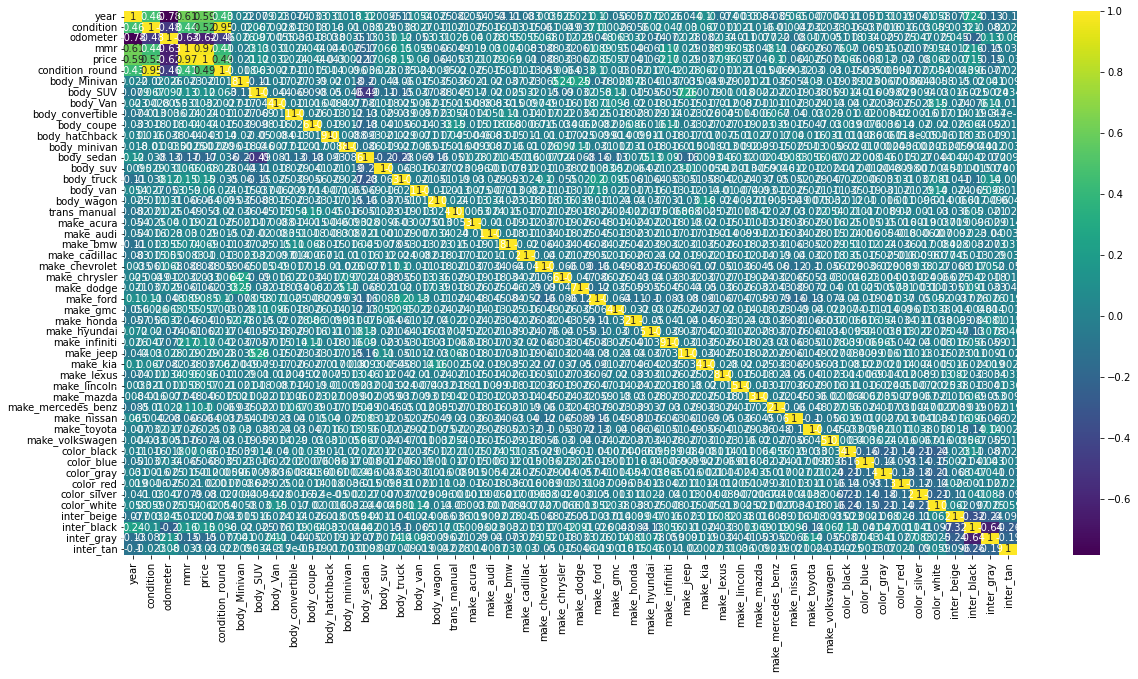

In [12]:
#sns.heatmap(corr)
plt.subplots(figsize=(20,10))
heat = sns.heatmap(corr, annot=True,  cmap="viridis")
#heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 30)
#heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 30)
plt.show()

## 3.e Feature Observation and Hypothesis

We can see on this heatmap whether the correlation between the price and MMR is the highest(0.97). MMR with year (0.61), and price with year (0.59).  Year and odometer is the most negative correlation(0.78). 

## 3.f univariate and multivariate analysis

### 3.f.1 univariate analysis
#### - Produce the distribution plot and boxplot of the price feature.

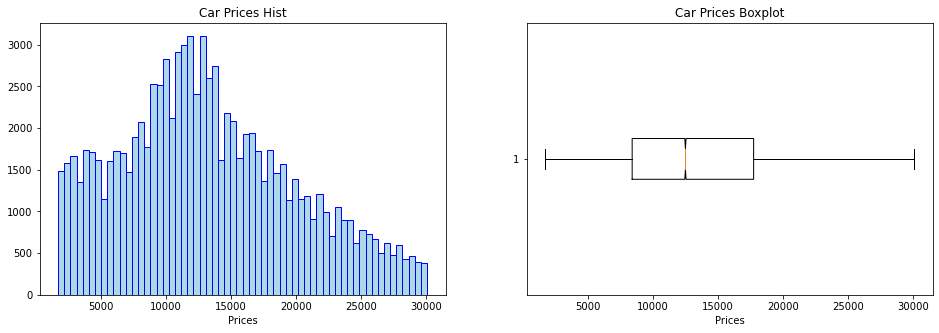

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Car Prices Hist')
plt.xlabel('Prices')
histPrice = plt.hist(df_ori.price,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(1,2,2)
plt.title('Car Prices Boxplot')
boxplotPrice = plt.boxplot(df_ori.price,notch=True, vert=False)
plt.xlabel('Prices')

plt.subplots_adjust(wspace=0.2)
plt.show()

#### - Produce the distribution plot and boxplot of the odometer feature

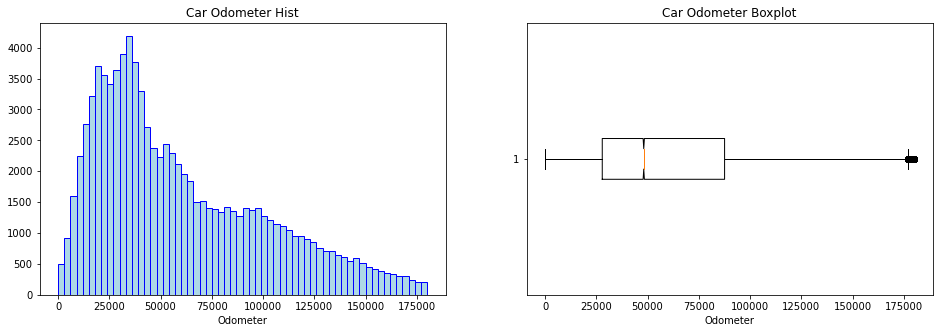

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Car Odometer Hist')
plt.xlabel('Odometer')
histPrice = plt.hist(df_ori.odometer,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(1,2,2)
plt.title('Car Odometer Boxplot')
boxplotPrice = plt.boxplot(df_ori.odometer,notch=True, vert=False)
plt.xlabel('Odometer')

plt.subplots_adjust(wspace=0.2)
plt.show()

The most car price frequency in this dataset is in range 10000 to 15000.
The most odometer frequency is in range 25000 to 50000.

## 3.f.2 Multivariate data analysis
#### - Create scatter plot to compare mmr and price,  odometer and price

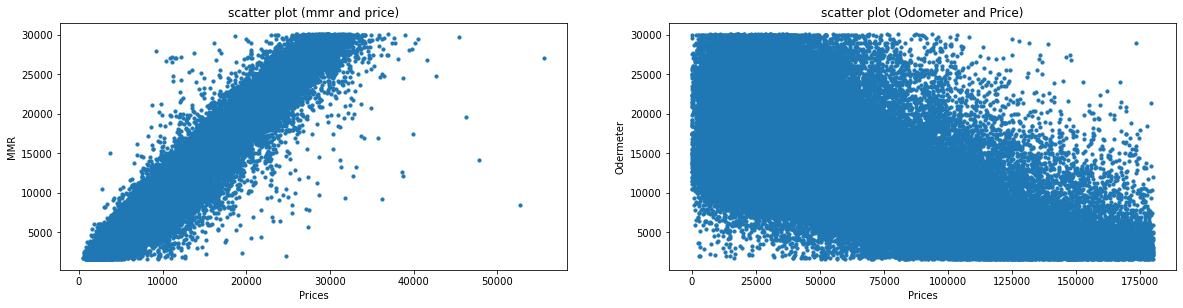

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('scatter plot (mmr and price)')
plt.xlabel('Prices')
plt.ylabel("MMR")
plt.scatter(df_ori.mmr,df_ori.price,s=10)

plt.subplot(2,2,2)
plt.title("scatter plot (Odometer and Price)")
plt.xlabel("Prices")
plt.ylabel("Odermeter")
plt.scatter(df_ori.odometer,df_ori.price,s=10)

plt.subplots_adjust(wspace=0.2)
plt.show()

### Write some text to explain

Multivariate analysis between Price and MMR, the result shows that's when MMR is high, the price will be high same as MMR.(positive correlation) the resule between Odometer and price are showing that when the odometer is incressing up will be reducing the car price down.(negative correlation)

# STEP 4: Feature Selection

## 4.a Create new valiable for price column and feature without price

In [16]:
target = df_ori.price
df_no_price = df_ori.drop(['price'],axis=1)
df = df_ori.copy()
print(target)
df_no_price

0        12800.0
1        14800.0
2        16500.0
3         2900.0
4        21700.0
          ...   
91763     5500.0
91764     3700.0
91765     6100.0
91766    15400.0
91767     9000.0
Name: price, Length: 91768, dtype: float64


,year,condition,odometer,mmr,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,body_coupe,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,2.2,36941.0,15000.0,2,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,2013,3.7,27601.0,13100.0,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,3.5,14184.0,17700.0,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2005,3.8,104969.0,2500.0,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2010,5.0,64812.0,19650.0,5,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91763,2007,2.2,161264.0,6675.0,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
91764,2004,1.9,110785.0,3175.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
91765,2011,2.1,47765.0,8050.0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
91766,2013,4.4,14887.0,14750.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4.b Correlation Based Selection (manual or threshold)

#### - select features that have high correlation with the price.

In [17]:
corr = abs(df.corr())

In [18]:
corr = corr[corr.price>0.1]
df_corr = corr.sort_values(by = 'price', ascending=False)
df_corr

,year,condition,odometer,mmr,price,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
price,0.594867,0.520801,0.623221,0.971740,1.000000,0.491869,0.021380,0.124943,0.032477,0.023910,...,0.066465,0.068054,0.012199,0.019786,0.080282,0.062118,0.007027,0.150618,0.147293,0.030225
mmr,0.614143,0.435766,0.628626,1.000000,0.971740,0.410031,0.022954,0.126476,0.030579,0.023935,...,0.070264,0.064733,0.015436,0.020606,0.079325,0.054387,0.012281,0.156279,0.150372,0.033156
odometer,0.784267,0.483551,1.000000,0.628626,0.623221,0.455450,0.026259,0.097224,0.005496,0.003615,...,0.018109,0.034034,0.025345,0.025062,0.046978,0.024506,0.045228,0.199223,0.128819,0.079852
year,1.000000,0.458647,0.784267,0.614143,0.594867,0.432721,0.022058,0.079221,0.022982,0.074105,...,0.010665,0.050938,0.030974,0.018731,0.040520,0.058408,0.076706,0.239350,0.133207,0.099661
condition,0.458647,1.000000,0.483551,0.435766,0.520801,0.951536,0.020016,0.067237,0.002840,0.012551,...,0.015627,0.037174,0.001627,0.001552,0.029993,0.059127,0.003190,0.100059,0.081862,0.023464
condition_round,0.432721,0.951536,0.455450,0.410031,0.491869,1.000000,0.017872,0.062936,0.002713,0.010775,...,0.015022,0.035305,0.000595,0.001707,0.027081,0.054177,0.004257,0.095673,0.077390,0.021893
body_sedan,0.122702,0.037628,0.133157,0.172218,0.171702,0.036471,0.195003,0.489204,0.081481,0.127228,...,0.022193,0.007981,0.046284,0.015050,0.027062,0.044173,0.044273,0.042057,0.072460,0.009814
make_infiniti,0.025928,0.047171,0.071994,0.166553,0.165965,0.041752,0.036594,0.056670,0.015291,0.013518,...,0.038556,0.006920,0.064515,0.041590,0.039928,0.008007,0.015559,0.055601,0.058997,0.011435
inter_black,0.239350,0.100059,0.199223,0.156279,0.150618,0.095673,0.019856,0.025359,0.076468,0.019142,...,0.108032,0.041113,0.046593,0.001064,0.040533,0.096577,0.319027,1.000000,0.636582,0.260038
inter_gray,0.133207,0.081862,0.128819,0.150372,0.147293,0.077390,0.040907,0.002409,0.109163,0.043912,...,0.087150,0.042698,0.041056,0.026709,0.083403,0.025184,0.236089,0.636582,1.000000,0.192436


In [19]:
df_sel_features = df[["price","mmr","year","condition","condition_round","odometer"]]
df_sel_features

,price,mmr,year,condition,condition_round,odometer
0,12800.0,15000.0,2013,2.2,2,36941.0
1,14800.0,13100.0,2013,3.7,4,27601.0
2,16500.0,17700.0,2014,3.5,4,14184.0
3,2900.0,2500.0,2005,3.8,4,104969.0
4,21700.0,19650.0,2010,5.0,5,64812.0
...,...,...,...,...,...,...
91763,5500.0,6675.0,2007,2.2,2,161264.0
91764,3700.0,3175.0,2004,1.9,2,110785.0
91765,6100.0,8050.0,2011,2.1,2,47765.0
91766,15400.0,14750.0,2013,4.4,4,14887.0


In [20]:
df_corr2 = df_sel_features.corr()
df_corr2

,price,mmr,year,condition,condition_round,odometer
price,1.000000,0.971740,0.594867,0.520801,0.491869,-0.623221
mmr,0.971740,1.000000,0.614143,0.435766,0.410031,-0.628626
year,0.594867,0.614143,1.000000,0.458647,0.432721,-0.784267
condition,0.520801,0.435766,0.458647,1.000000,0.951536,-0.483551
condition_round,0.491869,0.410031,0.432721,0.951536,1.000000,-0.455450
odometer,-0.623221,-0.628626,-0.784267,-0.483551,-0.455450,1.000000


## 4.c Variance Threshold Selection

In [21]:
# Assign X and y value
X = df_no_price
y = target

In [22]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)
vt.fit(X)
#VarianceThreshold(threshold=0.15)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

,year,condition,odometer,mmr,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,body_coupe,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
variance,10.275313,0.799136,1691470260.967544,44932843.616369,0.853497,0.038573,0.165062,0.007205,0.017205,0.034029,...,0.157799,0.083281,0.130772,0.072634,0.130041,0.153129,0.094606,0.248588,0.217683,0.067568
select_feature,True,True,True,True,True,False,True,False,False,False,...,True,False,True,False,True,True,False,True,True,False


In [23]:
df_vt = X.iloc[:,vt.get_support()]
print(df_vt.shape)
df_vt.head()

(91768, 14)


,year,condition,odometer,mmr,condition_round,body_SUV,body_sedan,make_ford,color_black,color_gray,color_silver,color_white,inter_black,inter_gray
0,2013,2.2,36941.0,15000.0,2,0,0,1,0,0,1,0,1,0
1,2013,3.7,27601.0,13100.0,4,0,1,0,0,0,0,1,0,0
2,2014,3.5,14184.0,17700.0,4,0,1,1,0,0,1,0,1,0
3,2005,3.8,104969.0,2500.0,4,0,1,0,0,0,0,1,0,1
4,2010,5.0,64812.0,19650.0,5,1,0,0,0,0,0,1,1,0


## 4.d Select K-Best method

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
kbest = SelectKBest(score_func=f_classif, k=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kbest.fit_transform(X_train, y_train)
df_selKBest = X.iloc[:,kbest.get_support()]
df_selKBest


,year,condition,odometer,mmr,condition_round,body_SUV,body_sedan,body_truck,make_bmw,make_infiniti,make_mercedes_benz,make_nissan,inter_black,inter_gray
0,2013,2.2,36941.0,15000.0,2,0,0,0,0,0,0,0,1,0
1,2013,3.7,27601.0,13100.0,4,0,1,0,0,0,0,0,0,0
2,2014,3.5,14184.0,17700.0,4,0,1,0,0,0,0,0,1,0
3,2005,3.8,104969.0,2500.0,4,0,1,0,0,0,0,0,0,1
4,2010,5.0,64812.0,19650.0,5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91763,2007,2.2,161264.0,6675.0,2,0,0,0,0,0,0,0,0,1
91764,2004,1.9,110785.0,3175.0,2,0,0,0,0,0,0,0,0,0
91765,2011,2.1,47765.0,8050.0,2,0,1,0,0,0,0,0,1,0
91766,2013,4.4,14887.0,14750.0,4,0,1,0,0,0,0,1,0,0


# STEP 5: Linear Regression Models with Feature Selection, Feature transformation and Scaling

In this part, you will make linear regression models by applying different combination of feature selection, feature transformation and feature scaling methods from the following options:
- Different selected features: correlation based selection, variance threshold, and selectKBest features
- The polynomial features of degree 2 without bias
- Choose one scaling method: either MinMax, Standard or Robust

Hint: Since you will combine several actions, try to make some functions to simplify your code, i.e., function to transform, function to scale, etc.
You should use 75:25 for training and testing and random_state=42. You should also evaluate the model by calculating the RMSE and R2 metrics.

## 5.a Initiate some lists to store your experiments’ result.

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Assign X and y value
X = df_no_price
y = target

fsel_list = []
ftrans_list = []
fscal_list = []
r2_scores = []
rmse_scores = []

## 5.b Linear Regression model with the Correlation based selected features

In [26]:
#Linear regression model
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)
model1 = make_pipeline(
    LinearRegression()
)
model1.fit(X_test_1, Y_test_1)
y_test_pred_1 = model1.predict(X_test_1) 

r2_1 = r2_score(Y_test_1, y_test_pred_1)
rmse_1 = np.sqrt(mean_squared_error(Y_test_1, y_test_pred_1))
print("Linear regression model")
print('R2 score = {:.2f}'.format(r2_1))
print('RMSE score = {:.2f}'.format(rmse_1))
print()
fsel_list.append("Correlation Based")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2_1)
rmse_scores.append(rmse_1)

Linear regression model
R2 score = 0.96
RMSE score = 1387.75



## 5.c Linear Regression model with Correlation based selected features and Polynomial Features transformation

In [27]:
#Linear regression model with PolynomialFeatures
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, y, test_size=0.25, random_state=42)
model2 = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
model2.fit(X_test_2, Y_test_2)
y_test_pred_2 = model2.predict(X_test_2) 

r2_2 = r2_score(Y_test_2, y_test_pred_2)
rmse_2 = np.sqrt(mean_squared_error(Y_test_2, y_test_pred_2))

print("Linear regression model with PolynomialFeatures")
print('R2 score = {:.2f}'.format(r2_2))
print('RMSE score = {:.2f}'.format(rmse_2))
print()

fsel_list.append("Correlation Based")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2_2)
rmse_scores.append(rmse_2)

Linear regression model with PolynomialFeatures
R2 score = 0.96
RMSE score = 1301.78



In [28]:
pd.DataFrame(model2[0].transform(X), columns=model2[0].get_feature_names_out(X.columns))

,year,condition,odometer,mmr,condition_round,body_Minivan,body_SUV,body_Van,body_convertible,body_coupe,...,inter_beige^2,inter_beige inter_black,inter_beige inter_gray,inter_beige inter_tan,inter_black^2,inter_black inter_gray,inter_black inter_tan,inter_gray^2,inter_gray inter_tan,inter_tan^2
0,2013.0,2.2,36941.0,15000.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2013.0,3.7,27601.0,13100.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2014.0,3.5,14184.0,17700.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2005.0,3.8,104969.0,2500.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2010.0,5.0,64812.0,19650.0,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91763,2007.0,2.2,161264.0,6675.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91764,2004.0,1.9,110785.0,3175.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91765,2011.0,2.1,47765.0,8050.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91766,2013.0,4.4,14887.0,14750.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 5.d Linear Regression model with Correlation based selected features and a feature scaling method

In [29]:
#Linear regression model with MinMax Scaler
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, y, test_size=0.25, random_state=42)
model3 = make_pipeline(
    MinMaxScaler(),  
    LinearRegression()
)
model3.fit(X_test_3, Y_test_3)  # apply scaling on training data
y_test_pred_3 = model3.predict(X_test_3) 

r2_3 = r2_score(Y_test_3, y_test_pred_3)
rmse_3 = np.sqrt(mean_squared_error(Y_test_3, y_test_pred_3))

print("Linear regression model with MinMax Scaler")
print('R2 score = {:.2f}'.format(r2_3))
print('RMSE score = {:.2f}'.format(rmse_3))
print()
fsel_list.append("Correlation Based")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2_3)
rmse_scores.append(rmse_3)

Linear regression model with MinMax Scaler
R2 score = 0.96
RMSE score = 1387.75



## 5.e Linear Regression model with All features, Polynomial Features and MinMax Scaling

In [30]:
#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X, y, test_size=0.25, random_state=42)
modelf = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
modelf.fit(X_test_f, Y_test_f)  # apply scaling on training data
y_test_pred_f = modelf.predict(X_test_f) 

r2_f = r2_score(Y_test_f, y_test_pred_f)
rmse_f = np.sqrt(mean_squared_error(Y_test_f, y_test_pred_f))
print()
print("Linear regression model with PolynomialFeatures and MinMax Scaler")
print('All R2 score = {:.2f}'.format(r2_f))
print('All RMSE score = {:.2f}'.format(rmse_f))
print()

fsel_list.append("Correlation Based")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2_f)
rmse_scores.append(rmse_f)


Linear regression model with PolynomialFeatures and MinMax Scaler
All R2 score = 0.96
All RMSE score = 1301.67



## 5.f Linear Regression model with Variance Threshold Selection
Use the dataframe obtained at step 4.c and repeat the step 5.b until 5.e. Make sure to always append the information to the lists you made at step 5.a. For the fsel_list list, you can use “VT”

#### repeat 5.b

In [31]:
#use df_vt
#Linear regression model
X_train_1_vt, X_test_1_vt, Y_train_1_vt, Y_test_1_vt = train_test_split(df_vt, y, test_size=0.25, random_state=42)
model1_vt = make_pipeline(
    LinearRegression()
)
model1_vt.fit(X_test_1_vt, Y_test_1_vt)
y_test_pred_1_vt = model1_vt.predict(X_test_1_vt) 

r2_1_vt = r2_score(Y_test_1_vt, y_test_pred_1_vt)
rmse_1_vt = np.sqrt(mean_squared_error(Y_test_1_vt, y_test_pred_1_vt))
print("Linear regression model (DF_VT)")
print('R2 score = {:.2f}'.format(r2_1_vt))
print('RMSE score = {:.2f}'.format(rmse_1_vt))
print()
fsel_list.append("VT")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2_1_vt)
rmse_scores.append(rmse_1_vt)


Linear regression model (DF_VT)
R2 score = 0.96
RMSE score = 1396.70



#### repeat 5.c

In [32]:
#use df_vt
#Linear regression model with PolynomialFeatures
X_train_2_vt, X_test_2_vt, Y_train_2_vt, Y_test_2_vt = train_test_split(df_vt, y, test_size=0.25, random_state=42)
model2_vt = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
model2_vt.fit(X_test_2_vt, Y_test_2_vt)
y_test_pred_2_vt = model2_vt.predict(X_test_2_vt) 

r2_2_vt = r2_score(Y_test_2_vt, y_test_pred_2_vt)
rmse_2_vt = np.sqrt(mean_squared_error(Y_test_2_vt, y_test_pred_2_vt))

print("Linear regression model with PolynomialFeatures (DF_VT)")
print('R2 score = {:.2f}'.format(r2_2_vt))
print('RMSE score = {:.2f}'.format(rmse_2_vt))
print()

fsel_list.append("VT")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2_2_vt)
rmse_scores.append(rmse_2_vt)

Linear regression model with PolynomialFeatures (DF_VT)
R2 score = 0.96
RMSE score = 1338.05



repeat 5.d

In [33]:
#use df_vt
#Linear regression model with MinMax Scaler
X_train_3_vt, X_test_3_vt, Y_train_3_vt, Y_test_3_vt = train_test_split(df_vt, y, test_size=0.25, random_state=42)
model3_vt = make_pipeline(
    MinMaxScaler(),  
    LinearRegression()
)
model3_vt.fit(X_test_3_vt, Y_test_3_vt)  # apply scaling on training data
y_test_pred_3_vt = model3_vt.predict(X_test_3_vt) 

r2_3_vt = r2_score(Y_test_3_vt, y_test_pred_3_vt)
rmse_3_vt = np.sqrt(mean_squared_error(Y_test_3_vt, y_test_pred_3_vt))

print("Linear regression model with MinMax Scaler (DF_VT)")
print('R2 score = {:.2f}'.format(r2_3_vt))
print('RMSE score = {:.2f}'.format(rmse_3_vt))
print()
fsel_list.append("VT")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2_3_vt)
rmse_scores.append(rmse_3_vt)


Linear regression model with MinMax Scaler (DF_VT)
R2 score = 0.96
RMSE score = 1396.70



#### repeat 5.e

In [34]:
#use df_vt
#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_f_vt, X_test_f_vt, Y_train_f_vt, Y_test_f_vt = train_test_split(df_vt, y, test_size=0.25, random_state=42)
modelf_vt = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression()
)
modelf_vt.fit(X_test_f_vt, Y_test_f_vt)  # apply scaling on training data
y_test_pred_f_vt = modelf_vt.predict(X_test_f_vt) 

r2_f_vt = r2_score(Y_test_f_vt, y_test_pred_f_vt)
rmse_f_vt = np.sqrt(mean_squared_error(Y_test_f_vt, y_test_pred_f_vt))
print()
print("Linear regression model with PolynomialFeatures and MinMax Scaler (DF_VT)")
print('All R2 score = {:.2f}'.format(r2_f_vt))
print('All RMSE score = {:.2f}'.format(rmse_f_vt))
print()

fsel_list.append("VT")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2_f_vt)
rmse_scores.append(rmse_f_vt)



Linear regression model with PolynomialFeatures and MinMax Scaler (DF_VT)
All R2 score = 0.96
All RMSE score = 1338.18



## 5.g Linear Regression model with Select KBest Selection
Use the dataframe obtained at step 4.d and repeat the step 5.b until 5.e. Make sure to always append the information to the lists you made at step 5.a. For the fsel_list list, you can use “SelectKBest”.

#### repeat 5.b

In [35]:
#use df_selKBest

#Linear regression model
X_train_1_selKBest, X_test_1_selKBest, Y_train_1_selKBest, Y_test_1_selKBest = train_test_split(df_selKBest, y, test_size=0.25, random_state=42)
model1_selKBest = make_pipeline(
    LinearRegression()
)
model1_selKBest.fit(X_test_1_selKBest, Y_test_1_selKBest)
y_test_pred_1_selKBest = model1_selKBest.predict(X_test_1_selKBest) 

r2_1_selKBest = r2_score(Y_test_1_selKBest, y_test_pred_1_selKBest)
rmse_1_selKBest = np.sqrt(mean_squared_error(Y_test_1_selKBest, y_test_pred_1_selKBest))
print("Linear regression model (DF_selKBest)")
print('R2 score = {:.2f}'.format(r2_1_selKBest))
print('RMSE score = {:.2f}'.format(rmse_1_selKBest))
print()
fsel_list.append("SelectKBest")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2_1_selKBest)
rmse_scores.append(rmse_1_selKBest)


Linear regression model (DF_selKBest)
R2 score = 0.96
RMSE score = 1396.54



#### repeat 5.c

In [36]:
#use df_selKBest
#Linear regression model with PolynomialFeatures
X_train_2_selKBest, X_test_2_selKBest, Y_train_2_selKBest, Y_test_2_selKBest = train_test_split(df_selKBest, y, test_size=0.25, random_state=42)
model2_selKBest = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
model2_selKBest.fit(X_test_2_selKBest, Y_test_2_selKBest)
y_test_pred_2_selKBest = model2_selKBest.predict(X_test_2_selKBest) 

r2_2_selKBest = r2_score(Y_test_2_selKBest, y_test_pred_2_selKBest)
rmse_2_selKBest = np.sqrt(mean_squared_error(Y_test_2_selKBest, y_test_pred_2_selKBest))

print("Linear regression model with PolynomialFeatures (DF_selKBest)")
print('R2 score = {:.2f}'.format(r2_2_selKBest))
print('RMSE score = {:.2f}'.format(rmse_2_selKBest))
print()

fsel_list.append("SelectKBest")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2_2_selKBest)
rmse_scores.append(rmse_2_selKBest)

Linear regression model with PolynomialFeatures (DF_selKBest)
R2 score = 0.96
RMSE score = 1339.18



#### repeat 5.d

In [37]:
#use df_selKBest
#Linear regression model with MinMax Scaler
X_train_3_selKBest, X_test_3_selKBest, Y_train_3_selKBest, Y_test_3_selKBest = train_test_split(df_selKBest, y, test_size=0.25, random_state=42)
model3_selKBest = make_pipeline(
    MinMaxScaler(),  
    LinearRegression()
)
model3_selKBest.fit(X_test_3_selKBest, Y_test_3_selKBest) 
y_test_pred_3_selKBest = model3_selKBest.predict(X_test_3_selKBest) 

r2_3_selKBest = r2_score(Y_test_3_selKBest, y_test_pred_3_selKBest)
rmse_3_selKBest = np.sqrt(mean_squared_error(Y_test_3_selKBest, y_test_pred_3_selKBest))

print("Linear regression model with MinMax Scaler (DF_selKBest)")
print('R2 score = {:.2f}'.format(r2_3_selKBest))
print('RMSE score = {:.2f}'.format(rmse_3_selKBest))
print()
fsel_list.append("SelectKBest")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2_3_selKBest)
rmse_scores.append(rmse_3_selKBest)


Linear regression model with MinMax Scaler (DF_selKBest)
R2 score = 0.96
RMSE score = 1396.54



#### repeat 5.e

In [38]:
#use df_selKBest
#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_f_selKBest, X_test_f_selKBest, Y_train_f_selKBest, Y_test_f_selKBest = train_test_split(df_selKBest, y, test_size=0.25, random_state=42)
modelf_selKBest = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression()
)
modelf_selKBest.fit(X_test_f_selKBest, Y_test_f_selKBest) 
y_test_pred_f_selKBest = modelf_selKBest.predict(X_test_f_selKBest) 

r2_f_selKBest = r2_score(Y_test_f_selKBest, y_test_pred_f_selKBest)
rmse_f_selKBest = np.sqrt(mean_squared_error(Y_test_f_selKBest, y_test_pred_f_selKBest))
print()
print("Linear regression model with PolynomialFeatures and MinMax Scaler (DF_selKBest)")
print('All R2 score = {:.2f}'.format(r2_f_selKBest))
print('All RMSE score = {:.2f}'.format(rmse_f_selKBest))
print()

fsel_list.append("SelectKBest")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2_f_selKBest)
rmse_scores.append(rmse_f_selKBest)



Linear regression model with PolynomialFeatures and MinMax Scaler (DF_selKBest)
All R2 score = 0.96
All RMSE score = 1339.37



# STEP 6: Linear Regression Model with Lasso

In [39]:
from sklearn.linear_model import Ridge, Lasso 

alphas = np.linspace(1, 0.001, 15)
alphas
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [40]:
# let's put them in the lasso! yee haw
rmse_list = []
r2_list = []
model_list = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=1000)
    lasso.fit(xtrain, ytrain)
    pred = lasso.predict(xtest)
    
    r2_list.append(lasso.score(xtrain,ytrain))
    rmse = mean_squared_error(ytest, pred)**0.5;
    rmse_list.append(rmse)
    model_list.append(lasso)
    print("Alpha",a,"RMSE",rmse)
    

lasso_df = pd.DataFrame(zip(alphas, rmse_list, r2_list), columns=['Alpha', 'RMSE', "R2"])
lasso_df

Alpha 1.0 RMSE 1375.5576458945939
Alpha 0.9286428571428571 RMSE 1375.4953200310895
Alpha 0.8572857142857143 RMSE 1375.4054257567243
Alpha 0.7859285714285714 RMSE 1375.3208525539778
Alpha 0.7145714285714286 RMSE 1375.2705345847157
Alpha 0.6432142857142857 RMSE 1375.205369532469
Alpha 0.5718571428571428 RMSE 1375.0436512331908
Alpha 0.5005 RMSE 1374.895028252452
Alpha 0.42914285714285716 RMSE 1374.7574670777722
Alpha 0.35778571428571426 RMSE 1374.637729388287
Alpha 0.2864285714285715 RMSE 1374.5368842923313
Alpha 0.21507142857142858 RMSE 1374.4550479914303
Alpha 0.14371428571428568 RMSE 1374.392726400376
Alpha 0.0723571428571429 RMSE 1374.350621132084
Alpha 0.001 RMSE 1374.3191022906876


,Alpha,RMSE,R2
0,1.000000,1375.557646,0.957685
1,0.928643,1375.495320,0.957691
2,0.857286,1375.405426,0.957697
3,0.785929,1375.320853,0.957704
4,0.714571,1375.270535,0.957709
5,0.643214,1375.205370,0.957714
6,0.571857,1375.043651,0.957724
7,0.500500,1374.895028,0.957733
8,0.429143,1374.757467,0.957740
9,0.357786,1374.637729,0.957747


In [41]:
lasso_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)

,Alpha,RMSE,R2
14,0.001,1374.319102,0.957762


In [42]:
#use lowest RMSE in Alpha records (15)
rmse_lasso = lasso_df.iloc[13]['RMSE']
r2_lasso = lasso_df.iloc[13]['R2']

fsel_list.append("Lasso, alpha=15") 
ftrans_list.append("none") 
fscal_list.append("none") 
r2_scores.append(r2_lasso)
rmse_scores.append(rmse_lasso)

# STEP 7: Linear Regression Model with Ridge

In [43]:
#We will cover Ridge and Lasso model in the next class.
X_train_ridge, X_test_ridge, Y_train_ridge, Y_test_ridge = train_test_split(X, y, test_size=0.25)
alphas = np.linspace(1, 0.001, 15)
#alphas = 10**np.linspace(5, -2, 15)
alphas

array([1.        , 0.92864286, 0.85728571, 0.78592857, 0.71457143,
       0.64321429, 0.57185714, 0.5005    , 0.42914286, 0.35778571,
       0.28642857, 0.21507143, 0.14371429, 0.07235714, 0.001     ])

In [44]:
# let's ridge them!
rmse_list = []
r2_list = []
model_list = []

for a in alphas:
    ridge = Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train_ridge, Y_train_ridge)
    pred_ridge = ridge.predict(X_test_ridge)
    
    r2_list.append(ridge.score(X_train_ridge,Y_train_ridge))
    rmse_ridge = mean_squared_error(Y_test_ridge, pred_ridge)**0.5;
    rmse_list.append(rmse_ridge)
    model_list.append(ridge)
    print("Alpha",a,"RMSE",rmse)
    
ridge_result = np.vstack((alphas, rmse_list, r2_list)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', "R2"])
ridge_df

Alpha 1.0 RMSE 1374.3191022906876
Alpha 0.9286428571428571 RMSE 1374.3191022906876
Alpha 0.8572857142857143 RMSE 1374.3191022906876
Alpha 0.7859285714285714 RMSE 1374.3191022906876
Alpha 0.7145714285714286 RMSE 1374.3191022906876
Alpha 0.6432142857142857 RMSE 1374.3191022906876
Alpha 0.5718571428571428 RMSE 1374.3191022906876
Alpha 0.5005 RMSE 1374.3191022906876
Alpha 0.42914285714285716 RMSE 1374.3191022906876
Alpha 0.35778571428571426 RMSE 1374.3191022906876
Alpha 0.2864285714285715 RMSE 1374.3191022906876
Alpha 0.21507142857142858 RMSE 1374.3191022906876
Alpha 0.14371428571428568 RMSE 1374.3191022906876
Alpha 0.0723571428571429 RMSE 1374.3191022906876
Alpha 0.001 RMSE 1374.3191022906876


,Alpha,RMSE,R2
0,1.000000,1374.885895,0.957622
1,0.928643,1374.885994,0.957622
2,0.857286,1374.886094,0.957622
3,0.785929,1374.886195,0.957622
4,0.714571,1374.886297,0.957622
5,0.643214,1374.886399,0.957622
6,0.571857,1374.886502,0.957622
7,0.500500,1374.886606,0.957622
8,0.429143,1374.886711,0.957622
9,0.357786,1374.886816,0.957622


In [45]:
ridge_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)

,Alpha,RMSE,R2
0,1.0,1374.885895,0.957622


In [46]:
#use lowest RMSE in Alpha records (15)
rmse_ridge = ridge_df.iloc[1]['RMSE']
r2_ridge= ridge_df.iloc[1]['R2']

fsel_list.append("Ridge, alpha=15") 
ftrans_list.append("none") 
fscal_list.append("none") 
r2_scores.append(r2_ridge)
rmse_scores.append(rmse_ridge)

# STEP 8: Plot and summary analysis

## 8.1 combind all result

In [47]:
result = np.vstack((fsel_list, ftrans_list, fscal_list, r2_scores, rmse_scores)).T
result_df = pd.DataFrame(result, columns=['Feature Selection', 'Feature Transformation', 'Feature Scaling', 'R2', 'RMSE'])
result_df

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
0,Correlation Based,None,None,0.9570035376951342,1387.7495855996906
1,Correlation Based,Poly 2,None,0.9621655841991856,1301.781995337379
2,Correlation Based,None,MinMax,0.9570035376951342,1387.7495855996906
3,Correlation Based,Poly 2,MinMax,0.9621720214853191,1301.6712456470657
4,VT,None,None,0.956446990647418,1396.702236792667
5,VT,Poly 2,None,0.960027989704808,1338.0512241485474
6,VT,None,MinMax,0.956446990647418,1396.702236792667
7,VT,Poly 2,MinMax,0.9600202937476235,1338.1800278945352
8,SelectKBest,None,None,0.9564572689511643,1396.5374195146255
9,SelectKBest,Poly 2,None,0.9599603022593444,1339.183653555748


In [48]:
# sorting
result_df.sort_values(by='R2', ascending=False)

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
3,Correlation Based,Poly 2,MinMax,0.9621720214853191,1301.6712456470657
1,Correlation Based,Poly 2,None,0.9621655841991856,1301.781995337379
5,VT,Poly 2,None,0.960027989704808,1338.0512241485474
7,VT,Poly 2,MinMax,0.9600202937476235,1338.1800278945352
9,SelectKBest,Poly 2,None,0.9599603022593444,1339.183653555748
11,SelectKBest,Poly 2,MinMax,0.9599494147073888,1339.365715876265
12,"Lasso, alpha=15",none,none,0.9577613220911788,1374.350621132084
13,"Ridge, alpha=15",none,none,0.9576219981620258,1374.8859943630027
0,Correlation Based,None,None,0.9570035376951342,1387.7495855996906
2,Correlation Based,None,MinMax,0.9570035376951342,1387.7495855996906


## 8.2 Selecting the best feature selection

In [ ]:
#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X, y, test_size=0.25, random_state=42)
modelf = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
modelf.fit(X_test_f, Y_test_f)  # apply scaling on training data
y_test_pred_f = modelf.predict(X_test_f) 

r2_f = r2_score(Y_test_f, y_test_pred_f)
rmse_f = np.sqrt(mean_squared_error(Y_test_f, y_test_pred_f))
print()
print("Linear regression model with PolynomialFeatures and MinMax Scaler")
print('All R2 score = {:.2f}'.format(r2_f))
print('All RMSE score = {:.2f}'.format(rmse_f))
print()

fsel_list.append("Correlation Based")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2_f)
rmse_scores.append(rmse_f)

In [53]:

#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(X, y, test_size=0.25, random_state=42)
model_selected = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  
    MinMaxScaler(),
    LinearRegression()
)
model_selected.fit(X_test_selected, Y_test_selected) 
y_pred_selected = model_selected.predict(X_test_selected) 

r2_selected = r2_score(Y_test_selected, y_pred_selected)
rmse_selected = np.sqrt(mean_squared_error(Y_test_selected, y_pred_selected))

print("Linear regression model with PolynomialFeatures and MinMax Scaler")
print('R2 score = {:.2f}'.format(r2_selected))
print('RMSE score = {:.2f}'.format(rmse_selected))
print()


Linear regression model with PolynomialFeatures and MinMax Scaler
R2 score = 0.96
RMSE score = 1301.67



## 8.3 Plot the scatter plot

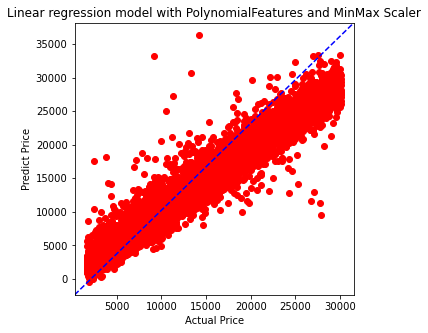

In [57]:
# Visualizing the best feature selection
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(Y_test_selected, y_pred_selected, color='red')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="blue")
plt.title('Linear regression model with PolynomialFeatures and MinMax Scaler')
plt.xlabel('Actual Price')
plt.ylabel('Predict Price')
plt.show()

In [ ]:
print("the coefficient: %.2f" % r2_selected)

In [ ]:
model_selected[2].coef_

## comment

Regarding to the result list, We can compare RMSE value then select the lowest value. So, we decided to use Linear regression model with PolynomialFeatures and MinMax Scaler. 
The R2 score is 0.96
RMSE score is 1301.67

# STEP 9: Out of Sample Prediction

In [ ]:
#create df_syn datafram from mean, min, max from df_describe()
df_syn = df.describe().loc[['mean','max','min']]
df_syn

In [ ]:
#reindex
df_syn.reset_index(drop=True, inplace=True)
df_syn

In [ ]:
#round all value
df_syn = round(df_syn)
df_syn = df_syn.loc[:,['year','condition','odometer','mmr','price','condition_round']]
df_syn

In [ ]:
#get detail data from df
df_detail = df.loc[:2]
df_detail = df_detail.drop(columns=['year','condition','odometer','mmr','price','condition_round'],axis=1)
df_detail

In [ ]:
#concat to make complete dataset
df_syn2 = pd.concat([df_syn, df_detail], axis=1)
df_syn2

In [ ]:
#transform or scale dataset by the best feature
df_syn2_no_price = df_syn2.drop(['price'],axis=1)
y_syn2 = df_syn2.price

#Linear regression model with PolynomialFeatures and MinMax Scaler
X_train_syn2, X_test_syn2, Y_train_syn2, Y_test_syn2 = train_test_split(df_syn2_no_price, y_syn2, test_size=0.25, random_state=42)
model_syn2 = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),  
    LinearRegression()
)
model_syn2.fit(df_syn2_no_price, y_syn2) 
y_test_pred_syn2 = model_syn2.predict(df_syn2_no_price) 

r2_syn2 = r2_score(y_syn2, y_test_pred_syn2)
rmse_syn2 = np.sqrt(mean_squared_error(y_syn2, y_test_pred_syn2))

print("Linear regression model with Polynomial Features and MinMax Scaler")
print('R2 score = {:.2f}'.format(r2_syn2))
print('RMSE score = {:.2f}'.format(rmse_syn2))
print()

In [ ]:
# Visualizing the best feature selection
plt.scatter(y_test_syn2, y_pred_syn2, color='red')
plt.title('Linear regression model with Polynomial Features and MinMax Scaler')
plt.xlabel('Actual Price')
plt.ylabel('Predict Price')
plt.show()

#Comment
Due to the data that use for prdict is not enough (only 3 records). the result can predict only one value. 

# STEP 10: Negative Value

In [ ]:
negative_val = y_pred_selected[y_pred_selected < 0]
negative_val[0]

#### comment

the coefficients of the best model is 0.96. and the negative value of prediction is -568.6728398017585. But when look at the corresponding rows from the test set that produces those negative predictions, we can't found any data that related with this value.